## **Project 3**

#### **Pre-processing of the Data**

We need first to transform the data as we did in the ProjectEx1 and ProjectEx2 :

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

diseases_df = pd.read_csv("CVD_cleaned.csv")

#Transfomation of the column "Sex" to a binary column "Is_Male with value 1 if the patient is a male and 0 if not".

diseases_df.rename(columns={'Sex': 'Is_Male'}, inplace=True)
diseases_df['Is_Male'] = diseases_df['Is_Male'].map({'Male': 1, 'Female': 0})

#Converts the ages intervals into a numeric value that represents the interval (average of the interval)

def convert_age(age_category):
  if age_category != "80+":

    ages = [int(age) for age in age_category.split('-')]
    average_age = sum(ages) / len(ages)
  else:

    average_age = 85
  return int(average_age)

diseases_df.rename(columns={'Age_Category': 'Age'}, inplace=True)
diseases_df['Age'] = diseases_df['Age'].apply(convert_age)

# Transforms those category to binary categories with 1 when "Yes" and 0 when "No". For "Diabetes" we convert this to 4 categories.
binary_features = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
                   'Depression', 'Diabetes', 'Arthritis', 'Smoking_History']

for feature in binary_features:
  diseases_df[feature] = diseases_df[feature].map({'Yes': 1, 'Yes, but female told only during pregnancy': 2,
                                                   'No, pre-diabetes or borderline diabetes': 3, 'No': 0})

# Maps for each level of a general health, we grade from 0 to 4.
diseases_df['General_Health'] = diseases_df['General_Health'].map({'Excellent': 4, 'Very Good': 3,
                                                            'Good': 2, 'Fair': 1, 'Poor': 0})

#Transform the type of the feature "Chcekup" from object to string

diseases_df = diseases_df.astype({'Checkup': 'string'})

diseases_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Within the past 2 years,0,0,0,0,0,0,1,0,72,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,Within the past year,0,1,0,0,0,1,0,0,72,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,Within the past year,1,0,0,0,0,1,0,0,62,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,Within the past year,1,1,0,0,0,1,0,1,77,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,Within the past year,0,0,0,0,0,0,0,1,85,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3,Within the past year,1,0,0,0,0,0,0,1,27,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,1,Within the past 5 years,1,0,0,0,0,1,0,1,67,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,3,5 or more years ago,1,0,0,0,1,2,0,0,32,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,3,Within the past year,1,0,0,0,0,0,0,1,67,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


#### **Part A: Linear Regression**

1) We will ask the following question : What is the influence of the height, the BMI and the sex on the weight?

2) We now sample a sample of size 200 from our population.


In [32]:
np.random.seed(2)
diseases_sample = diseases_df.sample(200)
diseases_sample

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
214446,0,Within the past year,0,0,0,0,0,1,1,0,52,165.0,124.28,45.60,1,0.0,0.0,2.0,1.0
3711,3,Within the past 2 years,1,0,0,0,0,0,0,0,72,173.0,65.77,22.05,0,23.0,60.0,10.0,1.0
100552,3,Within the past 2 years,1,0,0,0,0,0,0,0,37,160.0,83.91,32.77,0,12.0,30.0,12.0,2.0
165972,4,Within the past year,1,0,0,0,0,0,0,0,32,160.0,65.77,25.69,0,2.0,16.0,8.0,4.0
212726,3,Within the past year,0,0,0,0,0,0,0,0,52,168.0,66.68,23.73,1,2.0,4.0,26.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,3,Within the past 2 years,1,0,0,0,0,0,0,1,21,196.0,72.57,18.97,0,5.0,30.0,4.0,4.0
139527,3,Within the past year,1,0,1,0,0,0,0,0,77,155.0,64.41,26.83,1,0.0,30.0,10.0,0.0
80337,2,Within the past 5 years,1,0,0,0,0,0,0,1,37,191.0,104.33,28.75,1,5.0,12.0,16.0,4.0
235590,2,Within the past year,1,0,0,0,0,0,0,1,62,170.0,72.57,25.06,1,0.0,12.0,30.0,12.0


3)a) We now build histograms and tables in order to represent the parameters.

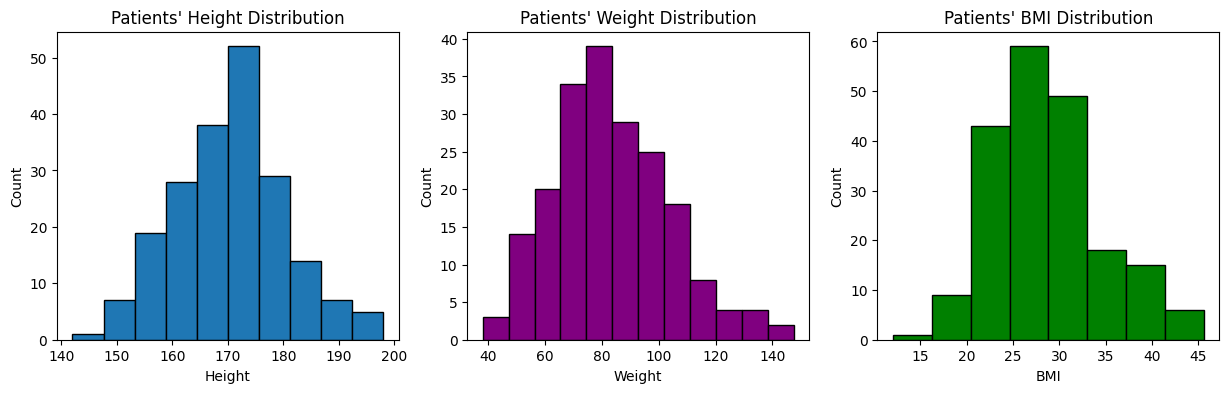

In [33]:
plots, axes = plt.subplots(1, 3, figsize=(15,4))

diseases_sample['Height_(cm)'].hist(edgecolor='black', grid=False, bins=10, ax=axes[0])
axes[0].set_title("Patients' Height Distribution")
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Count')

diseases_sample['Weight_(kg)'].hist(edgecolor='black', grid=False, bins=12, ax=axes[1], color='purple')
axes[1].set_title("Patients' Weight Distribution")
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('Count')

diseases_sample['BMI'].hist(edgecolor='black', grid=False, bins=8, ax=axes[2], color='green')
axes[2].set_title("Patients' BMI Distribution")
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Count')

plt.show()

In [34]:
diseases_sample[['Height_(cm)', 'Weight_(kg)', 'BMI']].describe().drop('count')

,Height_(cm),Weight_(kg),BMI
mean,170.160000,83.139550,28.596150
std,10.200227,20.460154,6.069798
min,142.000000,38.100000,12.050000
25%,163.000000,68.040000,24.385000
50%,170.000000,81.420000,27.410000
75%,178.000000,98.430000,31.780000
max,198.000000,147.420000,45.610000


In [35]:
gender_df = diseases_sample.groupby('Is_Male', as_index=False).size().rename(columns={"size": "number of patients"}).set_index(["Is_Male"])
gender_df["Gender"] = ['Female', 'Male']
gender_df = gender_df.set_index(["Gender"])

gender_df

,number of patients
Gender,
Female,103
Male,97


b) There is not missing data because when we do the ProjectEx1 we checked if there is missing data and we found that all the rows are fully of data.

- ***Height***: We can see that in the sample of size 200 a normal distribution of the height of the patients. We can see thanks to the histogram and the table that the distribution is symmetric around 175cm. There are some expections around height of 195cm and 140-145cm.

- ***Weight***: We can see that in the sample of size 200 a normal distribution of the weight of the patients. We can see thanks to the histogram and to the table that the distribution is symmetric around 80kg. There are some excpetions such that weights of 120kg and more or weights of 50 ans less.

- ***BMI***: We can see that in the sample of size 200 a normal distribution of the BMI of the patients. We can see thanks to the histogram and to the table that the distribution is symmetric around BMI of 25. There are also some excpetions around 15 and around 45.

- ***Sex***: In the table, we can see equal quantity of males ans females. So we can assume that the distribution of the sex of the patient is uniform.

c) Now we will plot for all the continous explainers parameters the plot of the weight as a function of those parameters. We will consider the height as a continous explainer parameter for this question in order to compare which continous explainer parameter influences the more the weight.

In [36]:
def plot_x_y(pair, df, title_X, title_Y):
  X = pair[0]
  Y = pair[1]

  spearman_coeff, p_value = stats.spearmanr(df[X], df[Y])

  print(f"Spearman's rank correlation coefficient: {spearman_coeff}")
  print(f"P value (H0: not correlated): {p_value}")
  print()

  plt.scatter(df[X], df[Y])
  plt.title(f"{title_X} VS {title_Y}", size=15, fontweight="bold")
  plt.xlabel(title_X)
  plt.ylabel(title_Y)
  plt.show()

  print()

Spearman's rank correlation coefficient: 0.49826452522195436
P value (H0: not correlated): 6.018952864026437e-14



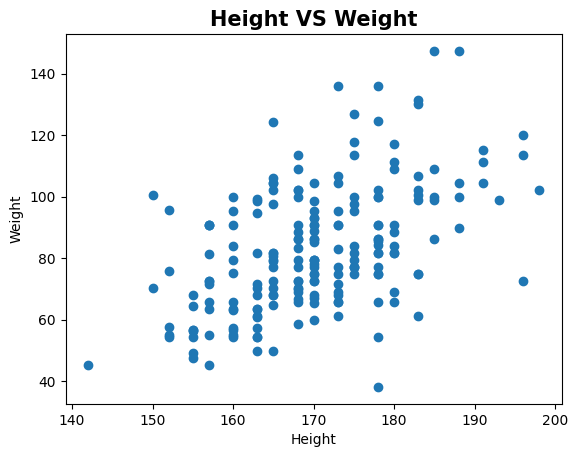


Spearman's rank correlation coefficient: 0.8846255480340378
P value (H0: not correlated): 1.591608115488462e-67



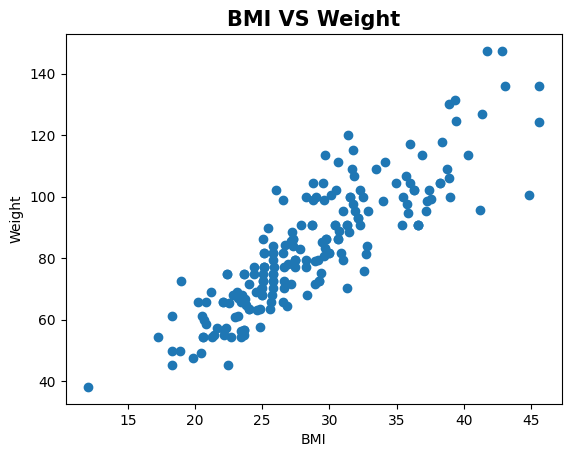

In [37]:
plot_x_y(["Height_(cm)", "Weight_(kg)"], diseases_sample, "Height", "Weight")
plot_x_y(["BMI", "Weight_(kg)"], diseases_sample, "BMI", "Weight")

- ***Height / Weight***: As we can see on the histogram and with the value of the correlation of Spearman, there is an influence of the height on the weight. Because of the correlation is positive so, when the height increases so the weight is likely to increase.

- ***BMI / Weight***: As we can see on the histogram and with the value of the correlation of Spearman, there is a strong influence of the BMI on the weight. Because of the correlation is positive so, when the height increases so the weight is likely to increase.

The explainer parameter that influences the more the BMI is the weight as we show by a value of the correlation of Spearman very high (next to 1) and a p-value very small.

d)We now plot the boxplot of the weight as a function of the sex:

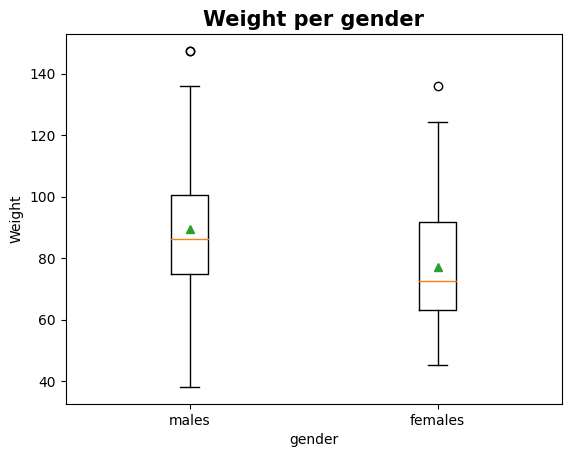

In [38]:
plt.boxplot([diseases_sample[diseases_sample["Is_Male"] == 1]["Weight_(kg)"],
             diseases_sample[diseases_sample["Is_Male"] == 0]["Weight_(kg)"]],
            showmeans=True, labels = ["males", "females"])

plt.title("Weight per gender",size=15, fontweight="bold")
plt.xlabel("gender")
plt.ylabel("Weight")
plt.plot()

plt.show()

In this boxplot, we can see that averaged weight and median of the males are bigger than the averaged weight and median of the females. We can also see that the variance of the weight of the males is bigger than the variance of the weight of the females. We can also see that the weight exceptions of the males are bigger than the weight exceptions of the females. So this plot informs us that there is a correlation between gender and weight.

4) Now we will calculate the line of regression:

In [39]:
from sklearn.linear_model import LogisticRegression

def calc_regression_model(df, dict_regression, interaction, model_type, num_explainers_params):
  X = df[[dict_regression[f"x{i + 1}"] for i in range(num_explainers_params)]].to_numpy()
  X = np.c_[np.ones(X.shape[0]), X]
  y = df[dict_regression["y"]].to_numpy()

  if interaction:
    for i in range(num_explainers_params):
      x_i = df[dict_regression[f"x{i + 1}"]].to_numpy()

      for j in range(i + 1, num_explainers_params):
        dict_regression[f"x{i + 1}{j + 1}"] = dict_regression[f"x{i + 1}"] + " * " + dict_regression[f"x{j + 1}"]
        x_j = df[dict_regression[f"x{j + 1}"]].to_numpy()

        x_i_j = np.multiply(x_i, x_j)
        X = np.c_[X, x_i_j]


  if model_type == "linear":
    XT_X_inv = np.linalg.inv(np.matmul(X.T, X))
    XT_y = np.matmul(X.T, y)

    beta_estimator = np.matmul(XT_X_inv, XT_y)

  else:
    model = LogisticRegression(penalty=None, fit_intercept=False).fit(X, y)
    beta_estimator = np.array(model.coef_[0])

  print("The model is:")
  print("y = ", end="")

  for i, key in zip(range(beta_estimator.shape[0]), dict_regression.keys()):
    print(f"({beta_estimator[i]})", end="")

    if key != "y":
      print(f" * {key}", end="")

    if i != beta_estimator.shape[0] - 1:
      print(" + ", end="")

  print()
  print()
  print("Where:")

  for key in dict_regression:
    print(f"{key} is the column {dict_regression[key]}")

  print()

  return beta_estimator, X, y

In [40]:
dict_regression = {"y": "Weight_(kg)","x1": "Height_(cm)", "x2": "BMI", "x3": "Is_Male"}
beta_estimator_sample, X_sample, y_sample = calc_regression_model(diseases_sample, dict_regression, False, "linear", 3)

The model is:
y = (-164.78061731769412) + (0.9734318887758207) * x1 + (2.8796240772662856) * x2 + (-0.13436068765940945) * x3

Where:
y is the column Weight_(kg)
x1 is the column Height_(cm)
x2 is the column BMI
x3 is the column Is_Male



- ***Height***: Increasing by one the value of the height increases the value of the weight by 0.9734318887758207.
- ***BMI***: Increasing by one the value of the BMI increases the value of the weight by 2.8796240772662856.
- ***Sex***: Increasing by one the value of the sex, i.e., from zero to one, i.e., from female to male, the weight decreases by 0.13436068765940945

5) We now print the ANOVA table, performing the F-test and calculate R^2 and R^2 adjusted:

In [41]:
def build_table(y, y_pred, y_avg, p, n):
  k = p-1

  SSR = sum([(y_pred[i] - y_avg)**2 for i in range(y_pred.shape[0])])
  SSRes = sum([(y[i]-y_pred[i])**2 for i in range(y_pred.shape[0])])
  SST = sum([(y[i]-y_avg)**2 for i in range(y_pred.shape[0])])

  MSR = SSR/k
  MSRes = SSRes/(n-p)
  MST = SST/(n-1)

  F_statistic = MSR/MSRes
  p_value = 1 - stats.f.cdf(F_statistic, k, n-p)

  anova_df = pd.DataFrame({"Sum of Squares": [SSR, SSRes, SST] , "df": [k, n-p, n-1], "MS": [MSR, MSRes, MST],
                       "F": [(f"F_statistic: {F_statistic}", f"p_value: {p_value}"), None, None]})

  anova_df.index = ["Regression", "Residuales\Errors", "Total"]
  pd.set_option('display.max_colwidth', None)
  display(anova_df)

  return SSR, SSRes, SST, MSR, MSRes, MST

In [42]:
n_sample = y_sample.shape[0]
p = 4
y_pred_sample = np.matmul(X_sample, beta_estimator_sample)
y_avg_sample = np.mean(y_sample)

SSR, SSRes, SST, MSR, MSRes, MST = build_table(y_sample, y_pred_sample, y_avg_sample, p, n_sample)

print(f"R^2 is: {SSR/SST}")
print(f"R^2 adjusted is: {1-(MSRes/MST)}")

,Sum of Squares,df,MS,F
Regression,82332.551732,3,27444.183911,"(F_statistic: 5531.65787025253, p_value: 1.1102230246251565e-16)"
Residuales\Errors,972.413727,196,4.961295,None
Total,83304.965459,199,418.617917,None


R^2 is: 0.9883270616378382
R^2 adjusted is: 0.98814839421387


6) Now we will calculate the confidence interval for all the coefficients of the regression model. We also estimate beta on the whole data.

In [43]:
beta_estimator_all, X_all, y_all = calc_regression_model(diseases_df, dict_regression, False, "linear", 3)

alpha = 0.05
quantile_alpha = stats.norm.ppf(1 - alpha/2)

C = np.linalg.inv(np.matmul(X_sample.T, X_sample))
e = y_sample - y_pred_sample
variance_estimate = 1/(n_sample-p) * sum([x**2 for x in e])

for i, param in zip(range(beta_estimator_sample.shape[0]), ["beta_0", "Height_(cm)", "BMI", "Is_Male"]):
  std_estimate = (variance_estimate * C[i][i]) ** (1/2)
  CI = [beta_estimator_sample[i] - quantile_alpha * std_estimate, beta_estimator_sample[i] + quantile_alpha * std_estimate]
  print(f"The Confidence interval for beta_{i} is: {CI}")
  print(f"Is the Confidence interval of {param} in the sample data contains the estimator of the whole data? {beta_estimator_all[i] >= CI[0] and beta_estimator_all[i] <= CI[1]}")
  print()

The model is:
y = (-168.56864713857067) + (0.9988520349462533) * x1 + (2.858094546385203) * x2 + (-0.16309861305626328) * x3

Where:
y is the column Weight_(kg)
x1 is the column Height_(cm)
x2 is the column BMI
x3 is the column Is_Male

The Confidence interval for beta_0 is: [-171.36119029481017, -158.20004434057807]
Is the Confidence interval of beta_0 in the sample data contains the estimator of the whole data? True

The Confidence interval for beta_1 is: [0.9339144354843247, 1.0129493420673166]
Is the Confidence interval of Height_(cm) in the sample data contains the estimator of the whole data? True

The Confidence interval for beta_2 is: [2.8285709860674957, 2.9306771684650754]
Is the Confidence interval of BMI in the sample data contains the estimator of the whole data? True

The Confidence interval for beta_3 is: [-0.93858026787434, 0.6698588925555211]
Is the Confidence interval of Is_Male in the sample data contains the estimator of the whole data? True



7) We want to check those hypotheses:

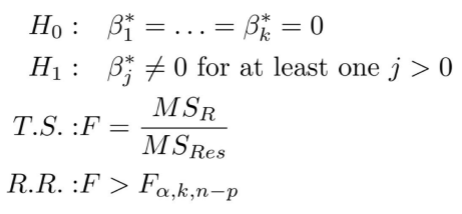

We will perform the F-Test when n is the sample_size (200), p = 4 (number of coefficients), k= 3 (number of explainers parameters) and alpha = 0.05

In [44]:
F_quantile_alpha = stats.f.ppf(alpha, p - 1, n_sample - p)
print(f"Reject H0? {MSR / MSRes > F_quantile_alpha}")

Reject H0? True


8) We now plot the graph of the residual in order to check if the following assumptions are true:
- 1) Assumption of linearity
- 2) Assumption of equality of the variances
- 3) Assumption of normal distribution of the noise.

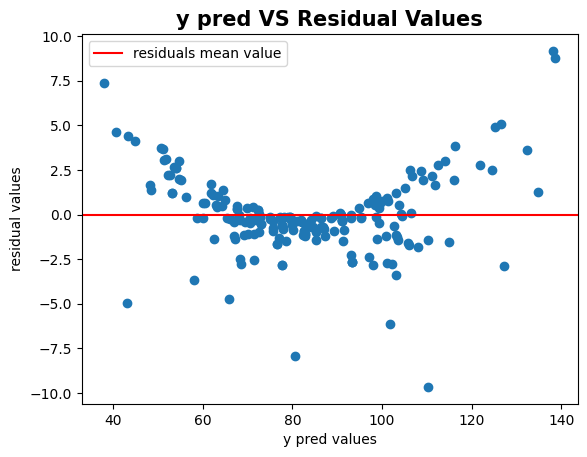

In [45]:
#Checking 1) and 2)
residual = y_sample - y_pred_sample

plt.scatter(y_pred_sample, residual)
plt.axhline(y=residual.mean(), color = "red", label = "residuals mean value")

plt.xlabel("y pred values")
plt.ylabel("residual values")
plt.title("y pred VS Residual Values", fontweight = "bold", fontsize = 15)
plt.legend()

plt.show()

We can see that the thickness of the strip of the points is not constant (very small for y pred equal to 75-85 and very large for weight of 40-60 and 110-140kg). So the assumption 2) is not correct. We can also see that the points are distributed in a quite symmetric way depending on the x-axis. So because one of the two facts does not hold so the assumption 1) is not correct.

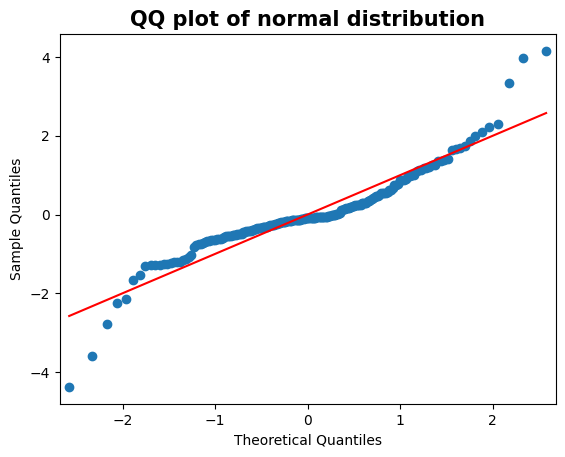

In [46]:
#Checking 3)

from statsmodels.graphics.gofplots import qqplot

qqplot(residual, stats.norm, fit=True, line="s")
plt.title("QQ plot of normal distribution", fontsize = 15, fontweight = "bold")

plt.show()

We can see that the assumption 3) seems correct because the samples quantiles are quite near from the line of the theorical quantiles.

9)a) We now sample a sample of size 1000 and predict the Y_new

In [47]:
intersection_empty = False
size = 1000
np.random.seed(10)

while not intersection_empty:
  diseases_new_sample = diseases_df.sample(size)
  intersection_empty = diseases_sample.index.intersection(diseases_new_sample.index).empty

diseases_new_sample

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
41852,3,Within the past year,1,0,0,0,1,3,1,0,72,152.0,72.57,31.25,1,0.0,60.0,60.0,0.0
142454,4,Within the past year,1,0,0,0,0,1,0,1,62,183.0,95.25,28.48,0,4.0,16.0,16.0,4.0
175939,4,Within the past year,1,0,0,0,1,0,0,0,57,163.0,61.23,23.17,1,0.0,60.0,28.0,0.0
241116,1,Within the past year,1,0,0,0,0,2,0,0,32,163.0,95.25,36.05,0,0.0,12.0,3.0,10.0
146365,2,Within the past year,0,0,1,0,1,2,1,0,72,152.0,66.68,28.71,0,0.0,8.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44679,2,Within the past year,1,0,1,1,0,1,0,1,62,188.0,104.33,29.53,0,0.0,12.0,0.0,12.0
301226,2,Within the past year,1,0,0,0,0,0,1,1,52,183.0,108.86,32.55,0,20.0,12.0,12.0,8.0
80979,0,Within the past year,1,0,0,0,0,0,1,0,47,165.0,74.84,27.46,1,0.0,0.0,2.0,3.0
87464,1,Within the past year,1,0,0,0,0,3,1,1,62,183.0,129.27,38.65,1,0.0,16.0,20.0,12.0


In [48]:
X_new = diseases_new_sample[["Height_(cm)", "BMI", "Is_Male"]].to_numpy()
X_new = np.c_[np.ones(X_new.shape[0]), X_new]

y_new = diseases_new_sample["Weight_(kg)"].to_numpy()

y_new_pred = np.matmul(X_new, beta_estimator_sample)

b) + c) We will build the confidence interval of the true value of Y_new with the prediction Y_new_pred and we will check if the true value Y_new belongs to the confidence interval.

In [49]:
n_new = X_new.shape[0]
occurences = 0

residual_new = y_new - y_new_pred
variance_new_estimate = 1/(n_new - p) * sum([e**2 for e in residual_new])

for i in range(n_new):
  X_C_XT = np.matmul(np.matmul(X_new[i], C), X_new[i].T)
  CI = [y_new_pred[i] - quantile_alpha * (variance_new_estimate * X_C_XT + variance_new_estimate) ** (1/2),
        y_new_pred[i] + quantile_alpha * (variance_new_estimate * X_C_XT + variance_new_estimate) ** (1/2)]

  if y_new[i] >= CI[0] and y_new[i] <= CI[1]:
    occurences += 1

print(f"The true value of Y appears in the CI {occurences / 10}% of the time")

The true value of Y appears in the CI 95.1% of the time


The signification of this result is that the linear model describes well the data. With 1000 new rows of data, we find that 951 were in the confidence interval with level of confidence of 95%. If the model didn't describe well the data, confidence interval for the points will  not catch well the true value of Y of the new points. So the percentage will be lower.

10) We will add to the model the interactions of the first order and compare which is the best model.

In [50]:
beta_estimator_inter, X_inter, y = calc_regression_model(diseases_sample, dict_regression, True, "linear", 3)
y_inter_pred = np.matmul(X_inter, beta_estimator_inter)

The model is:
y = (4.604699165211059) + (-0.028766595810338913) * x1 + (-2.804984586317005) * x2 + (-15.229003809796268) * x3 + (0.03356106260503111) * x12 + (0.08809719579915054) * x13 + (0.0074379927777954435) * x23

Where:
y is the column Weight_(kg)
x1 is the column Height_(cm)
x2 is the column BMI
x3 is the column Is_Male
x12 is the column Height_(cm) * BMI
x13 is the column Height_(cm) * Is_Male
x23 is the column BMI * Is_Male



In [51]:
def compute_R_adjusted_and_mallow(n, p, y_pred, y_pred_for_var, beta_estimator):

  # Computing R^2 adjusted
  SSRes = sum([(y[i] - y_pred[i])**2 for i in range(y_pred.shape[0])])
  SST = sum([(y[i] - y_avg_sample)**2 for i in range(y_pred.shape[0])])

  MSRES = SSRes/(n-p)
  MST = SST/(n-1)

  R_adjusted = 1 - (MSRES/MST)

  # Computing mallow
  res = y - y_pred_for_var
  var_estimate = 1/(n-p) * sum([x**2 for x in res])
  mallow_value = SSRes + 2 * beta_estimator.shape[0] * var_estimate

  return R_adjusted, mallow_value

In [52]:
R_adjusted_original, mallow_original = compute_R_adjusted_and_mallow(200, 4, y_pred_sample, y_inter_pred, beta_estimator_sample)
R_adjusted_inter, mallow_inter = compute_R_adjusted_and_mallow(200, 7, y_inter_pred, y_inter_pred, beta_estimator_inter)

comparison_df = pd.DataFrame({"R^2 adjusted": [R_adjusted_original, R_adjusted_inter],
                              "Mallow Statistic": [mallow_original, mallow_inter]})
comparison_df.index = ["Original model", "Model with interactions"]
comparison_df

,R^2 adjusted,Mallow Statistic
Original model,0.988148,973.530330
Model with interactions,0.999661,29.341213


Thanks to the table we can see for the model with interactions: the mallow value is smaller and the R^2 adjusted is higher so we will prefer the model with interactions.

#### **Part B: Logistic Regression**

1) We will ask the following question: What is the influence of the weight, the age and the sex on the presence of exercise?

2) Now we will sample a sample of size 200:

In [53]:
np.random.seed(8)
diseases_sample = diseases_df.sample(200)
diseases_sample

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
175095,4,Within the past year,1,0,0,0,0,0,0,1,57,180.0,78.47,24.13,1,16.0,90.0,16.0,2.0
301775,2,Within the past year,1,0,1,0,0,0,0,0,77,173.0,86.18,28.89,1,28.0,12.0,12.0,2.0
301420,3,Within the past year,1,0,0,0,1,0,0,0,72,163.0,44.91,16.99,1,28.0,0.0,20.0,30.0
169691,0,Within the past year,0,0,0,1,1,1,1,1,47,173.0,81.65,27.37,1,0.0,3.0,0.0,0.0
71488,3,5 or more years ago,0,0,0,0,0,0,0,1,27,183.0,99.79,29.84,0,5.0,8.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197809,2,Within the past 2 years,0,0,0,0,1,0,0,0,42,155.0,65.77,27.40,1,1.0,3.0,0.0,30.0
107956,2,Within the past year,1,0,0,0,0,0,0,1,32,178.0,107.05,33.86,0,4.0,20.0,8.0,20.0
18089,3,Within the past year,1,0,0,0,0,0,0,0,32,155.0,52.16,21.73,0,1.0,30.0,30.0,0.0
121599,3,Within the past year,0,0,0,0,0,0,0,0,32,165.0,122.47,44.93,0,0.0,12.0,8.0,8.0


3) We now build histograms in order to represent the parameters. Like the part A, there is no missing data because we check in ProjectEx1 that all the dataset is fully of data.

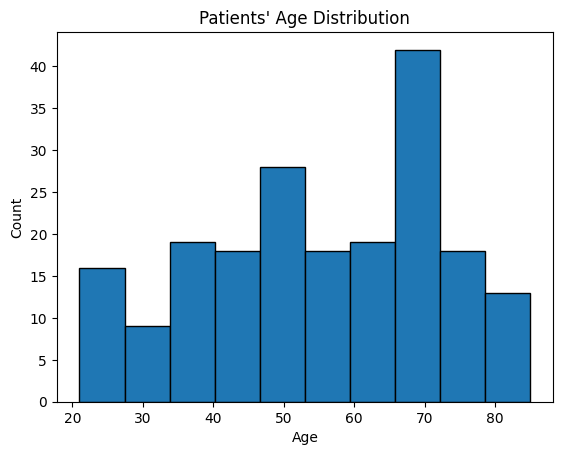

In [54]:
diseases_sample['Age'].hist(edgecolor='black', grid=False, bins=10)
plt.title("Patients' Age Distribution")
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

We can see that the distribution of the data is not symmetric. In fact we can see that there is more patients with age around 60 and 70 years old. There is no exception on the data, all the ages are well represented.

In [55]:
exercise_df = diseases_sample.groupby('Exercise', as_index=False).size().\
                rename(columns={"size": "Number of patients"}).set_index(['Exercise'])

exercise_df["Exercise"] = ['No', 'Yes']
exercise_df = exercise_df.set_index(["Exercise"])

exercise_df

,Number of patients
Exercise,
No,54
Yes,146


We can see that the distribution of the data is not symmetric because there is much more patients that do not suffer of depression that patients that suffer of depression.

c) Now we will plot histograms of the explained parameter as a function of each explainer parameter.

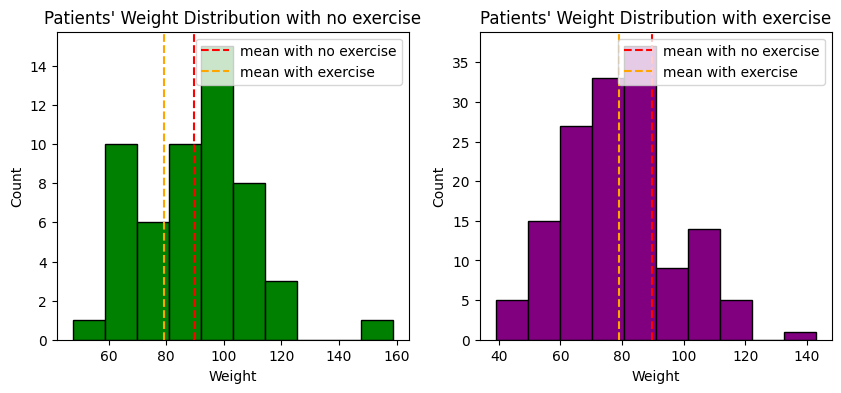

In [56]:
plots, axes = plt.subplots(1, 2, figsize=(10,4))

for i, color, negation in zip(range(len(axes)), ['green', 'purple'], ["no ", ""]):
  diseases_sample[diseases_sample["Exercise"] == i]["Weight_(kg)"].hist(edgecolor='black', grid=False, bins= 10, ax=axes[i], color=color)
  axes[i].set_title(f"Patients' Weight Distribution with {negation}exercise")
  axes[i].set_xlabel('Weight')
  axes[i].set_ylabel('Count')

  axes[i].axvline(np.mean(diseases_sample[diseases_sample["Exercise"] == 0]["Weight_(kg)"].to_numpy()),
                color='red', linestyle='--', label="mean with no exercise")
  axes[i].axvline(np.mean(diseases_sample[diseases_sample["Exercise"] == 1]["Weight_(kg)"].to_numpy()),
                color='orange', linestyle='--', label="mean with exercise")
  axes[i].legend()

plt.show()

We can see on those histograms that there is a significant difference between weight of people who do exercise with weight of people who do not exercise. We can also see that the majority of the weights of the people that are doing exercise is between 50 and 90kg, and the majority of the weights of the people that are not doing exercise is between 60 and 110kg.

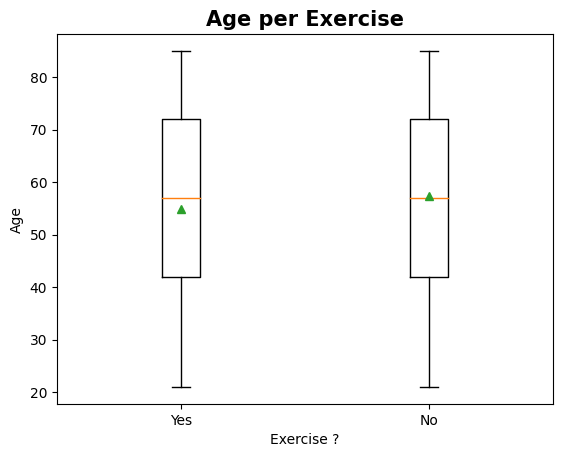

In [57]:
plt.boxplot([diseases_sample[diseases_sample["Exercise"] == 1]["Age"],
             diseases_sample[diseases_sample["Exercise"] == 0]["Age"]],
            showmeans=True, labels = ["Yes", "No"])

plt.title("Age per Exercise",size=15, fontweight="bold")
plt.xlabel("Exercise ?")
plt.ylabel("Age")
plt.plot()

plt.show()

We can see that the boxplots are very similar.

In [58]:
exercise_sex_df = diseases_sample.groupby(['Exercise', 'Is_Male'], as_index=False).size().\
                    rename(columns={"size": "Number of patients"})

exercise_sex_df["Exercise"] = exercise_sex_df["Exercise"].replace({0: "No", 1: "Yes"})
exercise_sex_df["Is_Male"] = exercise_sex_df["Is_Male"].replace({0: "Female", 1: "Male"})

exercise_sex_df

,Exercise,Is_Male,Number of patients
0,No,Female,27
1,No,Male,27
2,Yes,Female,79
3,Yes,Male,67


We can see that the number of male who are doing exercise is quite similar of number of female who are doing exercise. Same thing for people that do not do exercise

So, we can conclude that the explainer parameter that influences the most the explained parameter is the weight.

4)Now we will calculate the estimator of the logistic regression and explained the significance of the coefficients.

In [59]:
dict_logistic_regression = {"y": "Exercise", "x1": "Weight_(kg)", "x2": "Age", "x3": "Is_Male"}

beta_estimator_logistic, X_logistic, y_logistic = calc_regression_model(diseases_sample, dict_logistic_regression, False, "logistic", 3)

The model is:
y = (3.89043831657445) + (-0.030556767167710806) * x1 + (-0.006737391880632322) * x2 + (0.11462667237062406) * x3

Where:
y is the column Exercise
x1 is the column Weight_(kg)
x2 is the column Age
x3 is the column Is_Male



In [60]:
for i in range(1, beta_estimator_logistic.shape[0]):
  print(f"if x{i} increases by 1 unit than y increases by: {np.exp(beta_estimator_logistic[i])}")

if x1 increases by 1 unit than y increases by: 0.9699053717235152
if x2 increases by 1 unit than y increases by: 0.9932852534586619
if x3 increases by 1 unit than y increases by: 1.1214546893910262


5) We now calculate the confidence interval of the coefficients, calculate beta estimator on the whole data and check if the coefficients are in the confidence intervals.

In [61]:
beta_estimator_logistic_all, X_logistic_all, y_logistic_all = calc_regression_model(diseases_df, dict_logistic_regression, False, "logistic", 3)

The model is:
y = (3.3205267590499092) + (-0.014967108961212798) * x1 + (-0.018425937101355802) * x2 + (0.48748181226560305) * x3

Where:
y is the column Exercise
x1 is the column Weight_(kg)
x2 is the column Age
x3 is the column Is_Male



In [62]:
def logistic_func(i):
  return np.exp(np.matmul(beta_estimator_logistic.T, X_logistic[i])) / (1 + np.exp(np.matmul(beta_estimator_logistic.T, X_logistic[i])))

In [63]:
diagonal = [logistic_func(i) * (1 - logistic_func(i)) for i in range(X_logistic.shape[0])]
V = np.diag(diagonal)
C = np.linalg.inv(X_logistic.T @ V @ X_logistic)

for i, param in zip(range(beta_estimator_logistic.shape[0]), ["beta_0", "Weight", "Age", "Is_Male"]):
  std_estimate = (C[i][i]) ** (1/2)
  CI = [beta_estimator_logistic[i] - quantile_alpha * std_estimate, beta_estimator_logistic[i] + quantile_alpha * std_estimate]

  print(f"The Confidence interval for beta_{i} is: {CI}")
  print(f"Is the Confidence interval of {param} in the sample data contains the estimator of the whole data? {beta_estimator_logistic_all[i] >= CI[0] and beta_estimator_logistic_all[i] <= CI[1]}")
  print()

The Confidence interval for beta_0 is: [2.028633240413239, 5.752243392735661]
Is the Confidence interval of beta_0 in the sample data contains the estimator of the whole data? True

The Confidence interval for beta_1 is: [-0.048667114535526704, -0.012446419799894907]
Is the Confidence interval of Weight in the sample data contains the estimator of the whole data? True

The Confidence interval for beta_2 is: [-0.025711714763015047, 0.012236931001750401]
Is the Confidence interval of Age in the sample data contains the estimator of the whole data? True

The Confidence interval for beta_3 is: [-0.5559596215127933, 0.7852129662540415]
Is the Confidence interval of Is_Male in the sample data contains the estimator of the whole data? True



6) We now calculate the model with interaction of first order and we will compare which is the best model using the likelihood ratio test:

In [64]:
beta_estimator_logistic_inter, X_logistic_inter, y_logistic_inter = calc_regression_model(diseases_sample,
                                                                                          dict_logistic_regression, True, "logistic", 3)
p_interaction = beta_estimator_logistic_inter.shape[0]

The model is:
y = (0.765838398555725) + (0.019713053157405604) * x1 + (0.08085629988374816) * x2 + (-5.819363312693943) * x3 + (-0.0012846447897270125) * x12 + (0.04902058761475266) * x13 + (0.03273152379473249) * x23

Where:
y is the column Exercise
x1 is the column Weight_(kg)
x2 is the column Age
x3 is the column Is_Male
x12 is the column Weight_(kg) * Age
x13 is the column Weight_(kg) * Is_Male
x23 is the column Age * Is_Male



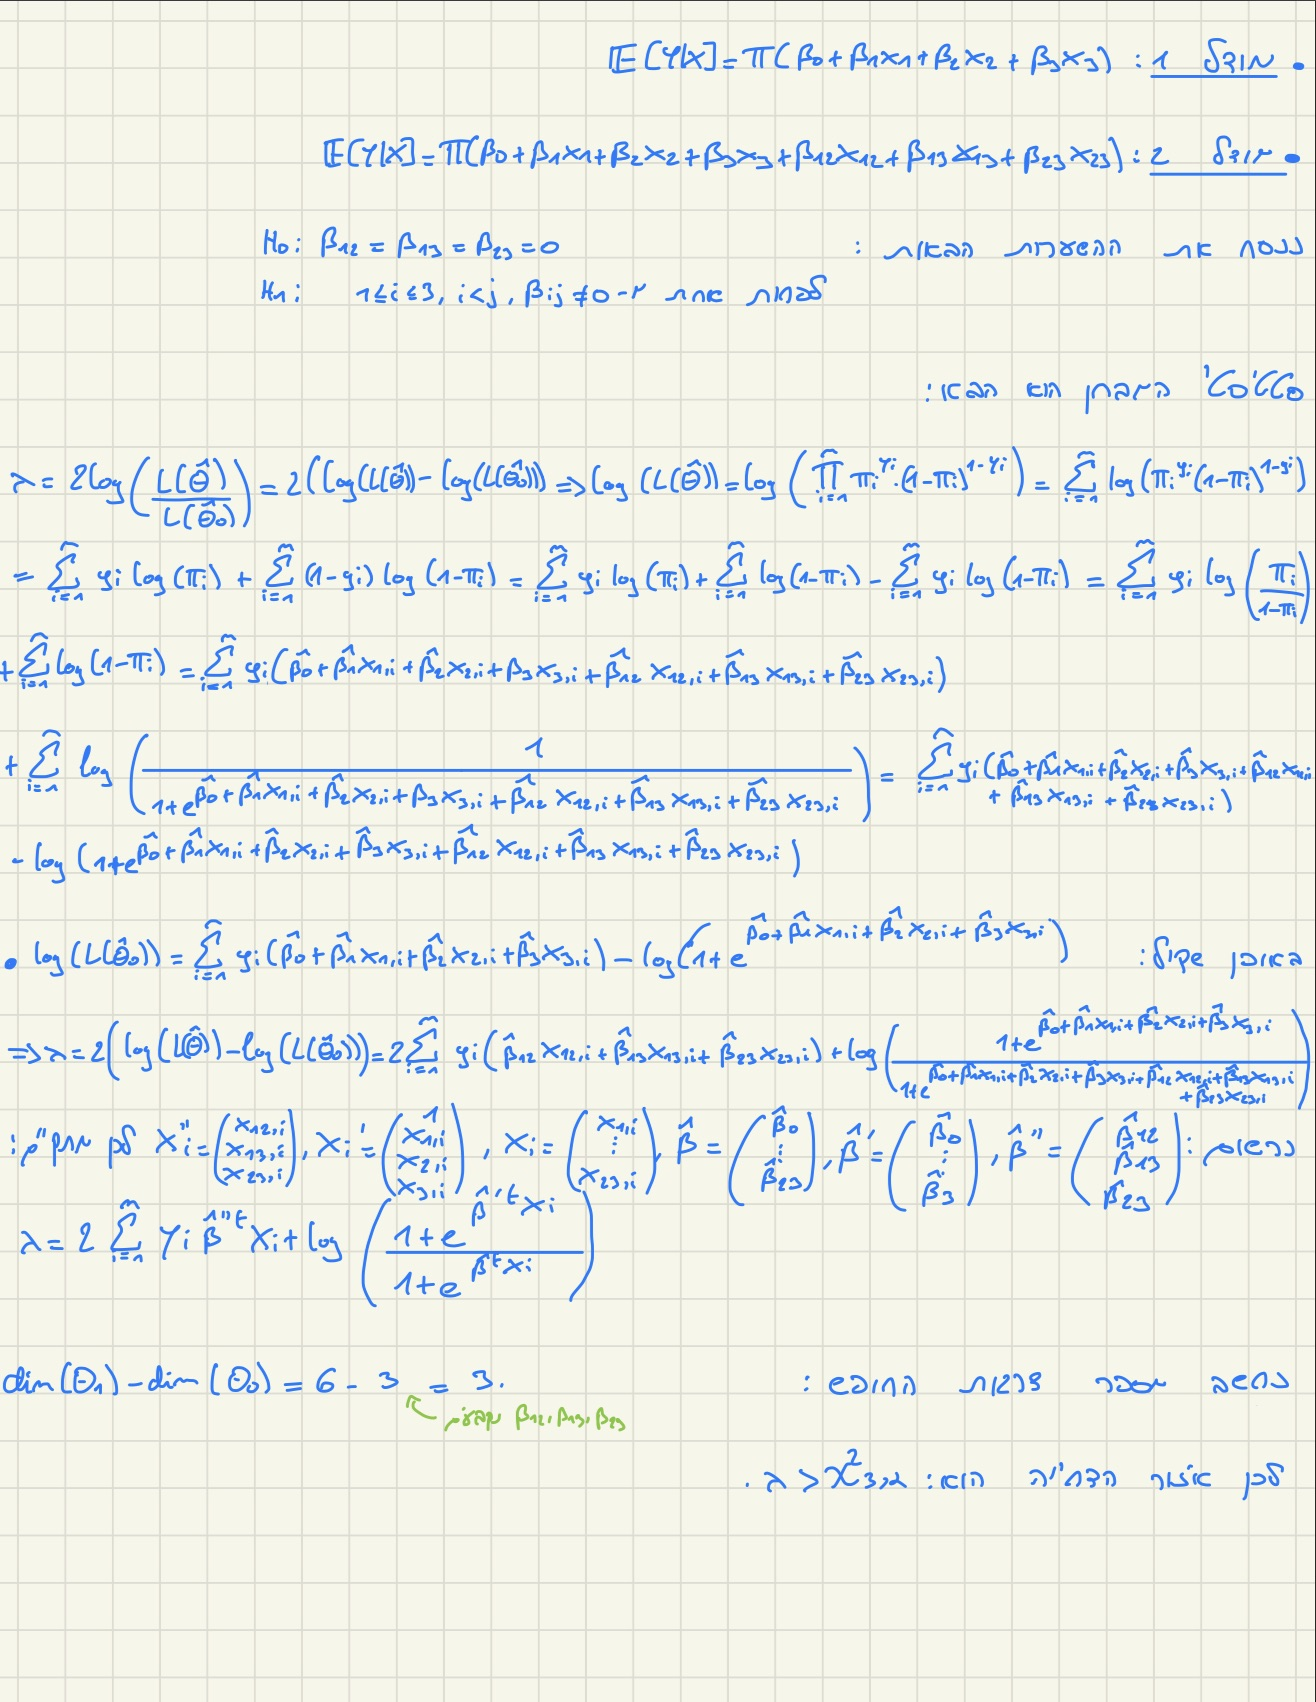

In [65]:
def likelihood_ratio_test(X, y, beta_estimator, p):
  separation_index = int((p + 1)/2)

  beta_estimator_original = beta_estimator[: separation_index]
  beta_estimator_intersection = beta_estimator[separation_index:]

  sum = 0

  for i in range(X.shape[0]):
    first_element = y[i] * beta_estimator_intersection @ X[i][separation_index:]
    second_element = np.log((1 + np.exp(beta_estimator_original @ X[i][:separation_index])) / (1 + np.exp(beta_estimator @ X[i])))

    sum += first_element + second_element

  return 2*sum

In [66]:
alpha = 0.05
degrees_of_freedom = 3

chi_statistic = likelihood_ratio_test(X_logistic_inter, y_logistic_inter, beta_estimator_logistic_inter, 7)
quantile_alpha_chi = stats.chi2.ppf(1 - alpha, degrees_of_freedom)

print(f"The Chi-Squared Statistic is: {chi_statistic}")
print(f"The Chi-Squared Quantile Test is: {quantile_alpha_chi}")
print(f"Reject H0? {chi_statistic > quantile_alpha_chi}")

The Chi-Squared Statistic is: 347.69492241886576
The Chi-Squared Quantile Test is: 7.814727903251179
Reject H0? True


So, with the likelihood ratio test, we conclude that the model with interactions is better that the original model because we rejected H0.

We now see with the Akaike Information Criterion (AIC) what is the best model:

The log likelihood of beta is:

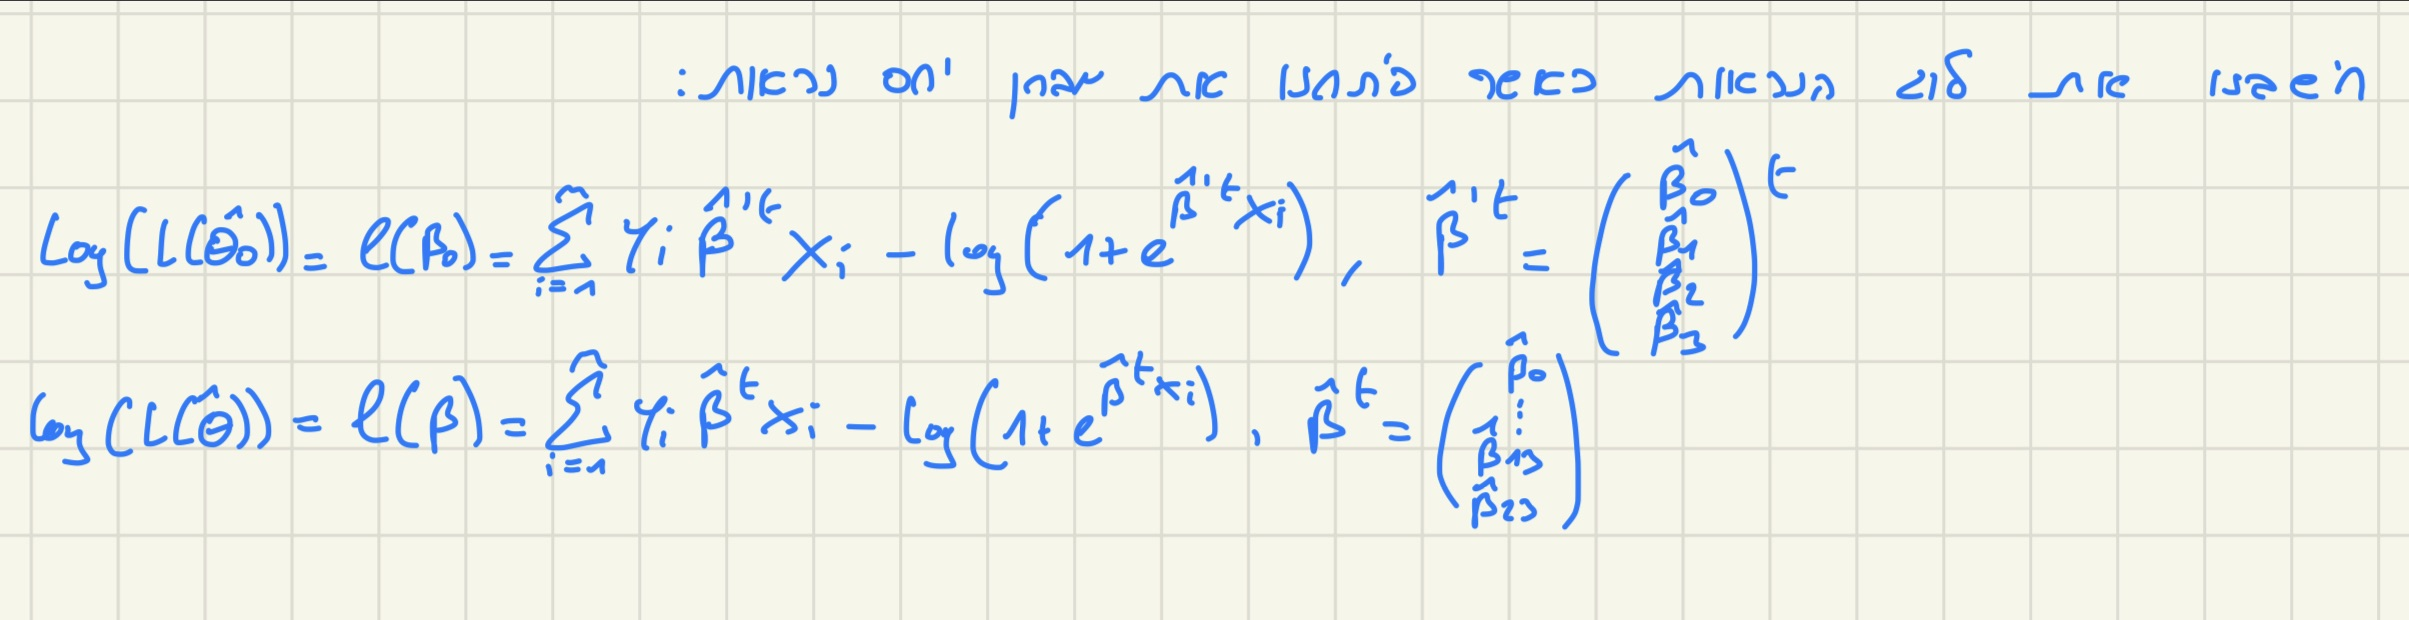

In [67]:
def calc_likelihood(X, y, beta_estimator):
  sum = 0

  for i in range(X.shape[0]):
    first_element = y[i] * beta_estimator @ X[i]
    second_element = np.log(1 + np.exp(beta_estimator @ X[i]))

    sum += first_element - second_element

  return sum

In [68]:
def calc_AIC_score(X, y, beta_estimator):
  return calc_likelihood(X, y, beta_estimator) - (beta_estimator.shape[0] - 1)

In [69]:
AIC_original_model = calc_AIC_score(X_logistic, y_logistic, beta_estimator_logistic)
AIC_interaction_model = calc_AIC_score(X_logistic_inter, y_logistic_inter, beta_estimator_logistic_inter)

print(f"The AIC of the original model is: {AIC_original_model}")
print(f"The AIC of the interaction model is: {AIC_interaction_model}")

The AIC of the original model is: -113.14890704538773
The AIC of the interaction model is: -110.4519012275862


So with the AIC measure we can conclude that we will prefer the model with interactions because it is this model that has the bigger AIC measure. In the two cases, we prefered the model with interactions.

7) We now perform the Forward/Backward Stepwise Regression in order to choose the best model. We will choose the AIC to choose which model is the best. We will throw the column "Checkup" because it is of type string.

In [70]:
features = list(diseases_sample.columns)
features.pop(1)

diseases_sample = diseases_sample[features]
diseases_sample

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
175095,4,1,0,0,0,0,0,0,1,57,180.0,78.47,24.13,1,16.0,90.0,16.0,2.0
301775,2,1,0,1,0,0,0,0,0,77,173.0,86.18,28.89,1,28.0,12.0,12.0,2.0
301420,3,1,0,0,0,1,0,0,0,72,163.0,44.91,16.99,1,28.0,0.0,20.0,30.0
169691,0,0,0,0,1,1,1,1,1,47,173.0,81.65,27.37,1,0.0,3.0,0.0,0.0
71488,3,0,0,0,0,0,0,0,1,27,183.0,99.79,29.84,0,5.0,8.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197809,2,0,0,0,0,1,0,0,0,42,155.0,65.77,27.40,1,1.0,3.0,0.0,30.0
107956,2,1,0,0,0,0,0,0,1,32,178.0,107.05,33.86,0,4.0,20.0,8.0,20.0
18089,3,1,0,0,0,0,0,0,0,32,155.0,52.16,21.73,0,1.0,30.0,30.0,0.0
121599,3,0,0,0,0,0,0,0,0,32,165.0,122.47,44.93,0,0.0,12.0,8.0,8.0


In [71]:
temp_columns = []

for i in range(len(features)):
  for j in range(i + 1, len(features)):
    name_column = f"{features[i]} * {features[j]}"
    temp_column_df = diseases_sample[features[i]] * diseases_sample[features[j]]
    temp_columns.append(pd.DataFrame({name_column: temp_column_df}))


diseases_sample_all_interactions = pd.concat([diseases_sample] + temp_columns, axis=1)

features_interactions = ["Heart_Disease * Skin_Cancer", "Depression * Arthritis", "Is_Male * Age", "Height_(cm) * Weight_(kg)",
                         "Skin_Cancer * Other_Cancer", "Depression * Smoking_History", "Fruit_Consumption * Green_Vegetables_Consumption",
                         "Height_(cm) * BMI", "Weight_(kg) * BMI", "Age * Smoking_History", "Is_Male * Alcohol_Consumption",
                         "Weight_(kg) * FriedPotato_Consumption", "Heart_Disease * Age"]

features_30_y = features + features_interactions
diseases_sample_interactions = diseases_sample_all_interactions[features_30_y]

y = diseases_sample_interactions["Exercise"].to_numpy()
X = diseases_sample_interactions.drop('Exercise', axis=1)

features_30 = list(X.columns)
X

,General_Health,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),...,Height_(cm) * Weight_(kg),Skin_Cancer * Other_Cancer,Depression * Smoking_History,Fruit_Consumption * Green_Vegetables_Consumption,Height_(cm) * BMI,Weight_(kg) * BMI,Age * Smoking_History,Is_Male * Alcohol_Consumption,Weight_(kg) * FriedPotato_Consumption,Heart_Disease * Age
175095,4,0,0,0,0,0,0,1,57,180.0,...,14124.60,0,0,1440.0,4343.40,1893.4811,57,16.0,156.94,0
301775,2,0,1,0,0,0,0,0,77,173.0,...,14909.14,0,0,144.0,4997.97,2489.7402,77,0.0,172.36,0
301420,3,0,0,0,1,0,0,0,72,163.0,...,7320.33,0,1,0.0,2769.37,763.0209,72,0.0,1347.30,0
169691,0,0,0,1,1,1,1,1,47,173.0,...,14125.45,0,1,0.0,4735.01,2234.7605,47,0.0,0.00,0
71488,3,0,0,0,0,0,0,1,27,183.0,...,18261.57,0,0,0.0,5460.72,2977.7336,0,5.0,1995.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197809,2,0,0,0,1,0,0,0,42,155.0,...,10194.35,0,1,0.0,4247.00,1802.0980,42,0.0,1973.10,0
107956,2,0,0,0,0,0,0,1,32,178.0,...,19054.90,0,0,160.0,6027.08,3624.7130,0,4.0,2141.00,0
18089,3,0,0,0,0,0,0,0,32,155.0,...,8084.80,0,0,900.0,3368.15,1133.4368,0,0.0,0.00,0
121599,3,0,0,0,0,0,0,0,32,165.0,...,20207.55,0,0,96.0,7413.45,5502.5771,0,0.0,979.76,0


In [72]:
import math

def add_best_param_forward(X, y, selected_parameters, left_parameters, scoring_function):
  best_param = None
  best_score = -math.inf

  for param in left_parameters:
    X_curr = X[selected_parameters + [param]].to_numpy()
    model = LogisticRegression(penalty=None, fit_intercept=False, max_iter=1000)
    model.fit(X_curr, y)

    beta_estimators = model.coef_[0]
    curr_score = scoring_function(X_curr, y, beta_estimators)

    if curr_score > best_score:
      best_param = param
      best_score = curr_score

  if best_param != None:
    left_parameters.remove(best_param)

  return best_score, selected_parameters + [best_param], left_parameters


def forward_stepwise(X, y, parameters, scoring_function):

  left_parameters = [param for param in parameters]
  score, selected_parameters = -math.inf, []

  next_score, selected_parameters, left_parameters = add_best_param_forward(X, y, selected_parameters, left_parameters, scoring_function)

  while score < next_score:
    score = next_score
    next_score, selected_parameters, left_parameters = add_best_param_forward(X, y, selected_parameters, left_parameters, scoring_function)

  return selected_parameters, score

In [73]:
def remove_worst_param_backward(X,y, selected_parameters, scoring_function):
  new_params = None
  best_score = -math.inf

  for param in selected_parameters:
    new_params = [p for p in selected_parameters]
    new_params.remove(param)
    X_curr = X[new_params].to_numpy()

    model = LogisticRegression(penalty=None, fit_intercept=False, max_iter=1000)
    model.fit(X_curr, y)

    beta_estimators = model.coef_[0]
    curr_score = scoring_function(X_curr, y, beta_estimators)

    if curr_score > best_score:
      selected_variables = new_params
      best_score = curr_score

  return best_score, selected_variables

def backward_stepwise(X, y, parameters, scoring_function):

  model = LogisticRegression(penalty=None, fit_intercept=False, max_iter=1000)
  model.fit(X, y)
  beta_estimators = model.coef_[0]

  selected_params = [param for param in parameters]
  score = scoring_function(X.to_numpy(), y, beta_estimators)
  next_score, selected_params = remove_worst_param_backward(X, y, selected_params, scoring_function)

  while score < next_score:
    score = next_score
    next_score, selected_params = remove_worst_param_backward(X, y, selected_params, scoring_function)

  return selected_params, score

In [74]:
import warnings
warnings.filterwarnings("ignore")

forward_AIC_informations = list(forward_stepwise(X , y, features_30, calc_AIC_score))
backward_AIC_informations = list(backward_stepwise(X, y, features_30, calc_AIC_score))

print("Forward Stepwise Method:")
print(f"Selected variables: {list(forward_AIC_informations[0])}")
print(f"AIC score: {forward_AIC_informations[1]}")
print()

print("Backward Stepwise Method:")
print(f"Selected variables: {list(backward_AIC_informations[0])}")
print(f"AIC score: {backward_AIC_informations[1]}")

Forward Stepwise Method:
Selected variables: ['General_Health', 'Weight_(kg) * BMI', 'Fruit_Consumption', 'Skin_Cancer', 'Is_Male * Alcohol_Consumption', 'Heart_Disease * Skin_Cancer', 'Depression', 'Age * Smoking_History', 'Is_Male']
AIC score: -92.17760649438866

Backward Stepwise Method:
Selected variables: ['General_Health', 'Skin_Cancer', 'Depression', 'Is_Male', 'Height_(cm)', 'BMI', 'Smoking_History', 'Fruit_Consumption', 'Heart_Disease * Skin_Cancer', 'Is_Male * Alcohol_Consumption']
AIC score: -91.26333744776879


We can see that the model obtained by the backward stepwise method is the best model because the score is higher that the score of the model obtained with forward stepwise method when the measure is AIC.

8) We will use the Bayesian information criterion (BIC) and calculate the model with the two methods:

In [75]:
def calc_BIC_score(X, y, beta_estimator):
  return calc_likelihood(X, y, beta_estimator) - (beta_estimator.shape[0] - 1) * math.log(y.shape[0]) / 2

In [76]:
forward_BIC_informations = list(forward_stepwise(X , y, features_30, calc_BIC_score))
backward_BIC_informations = list(backward_stepwise(X, y, features_30, calc_BIC_score))

print("Forward Stepwise Method:")
print(f"Selected variables: {list(forward_BIC_informations[0])}")
print(f"BIC score: {forward_BIC_informations[1]}")
print()

print("Backward Stepwise Method:")
print(f"Selected variables: {list(backward_BIC_informations[0])}")
print(f"BIC score: {backward_BIC_informations[1]}")
print()

print(f"Is it a submodel of the forward AIC measure? {all(element in forward_AIC_informations[0] for element in forward_AIC_informations[0])}")
print(f"Is it a submodel of the backward AIC measure? {all(element in backward_AIC_informations[0] for element in backward_AIC_informations[0])}")

Forward Stepwise Method:
Selected variables: ['General_Health', 'Weight_(kg) * BMI', 'Fruit_Consumption', 'Skin_Cancer']
BIC score: -101.04209235408035

Backward Stepwise Method:
Selected variables: ['General_Health', 'Skin_Cancer', 'BMI', 'Heart_Disease * Skin_Cancer']
BIC score: -100.79007975058595

Is it a submodel of the forward AIC measure? True
Is it a submodel of the backward AIC measure? True


We can see now that with measure BIC, we have now two others models and the decision about the best model does not change because the BIC scores are lower than the AIC score. We can see that the models that we obtained with the BIC measure is a submodel of the models obtained by the AIC measure. This fact is reasonable because the BIC measure gives bigger penalty to model complexity.